IPR on one of the edge site: 0.10275399282830988


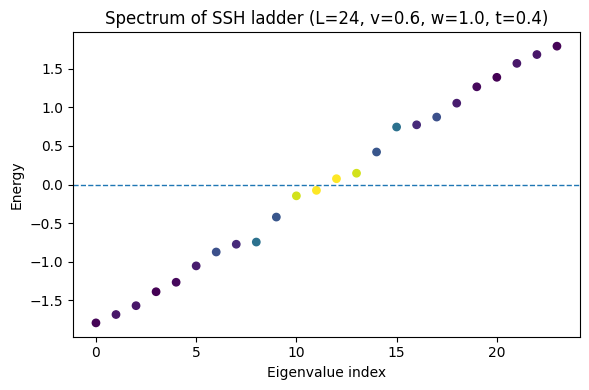

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def build_real_space_H(L, v, w, t):
    assert L % 4 == 0, "L must be a multiple of 4"
    H = np.zeros((L, L), dtype=complex)
    def add_hop(i, j, amp):
        #print(amp, i, j)
        H[i, j] -= amp
        H[j, i] -= np.conjugate(amp)

    # v and w terms
    for j in range(L//2-1):
        if j % 2 == 0:
            add_hop(j, j+1, v)
            add_hop(j+L//2, j+1+L//2, v)
        else:
            add_hop(j, j+1, w) 
            add_hop(j+L//2, j+1+L//2, w)

    # t rungs
    for j in range(L // 8): 
        add_hop(4*j+1, L//2 + 4*j+1, t)
        add_hop(4*j+2, L//2 + 4*j+2, t)
    return H


def edge_weight(evecs, L):
    edge_sites = np.array([0, L//2 - 1, L//2, L - 1])
    probs = np.abs(evecs[edge_sites, :])**2
    return probs.sum(axis=0)

L, v, w, t = 24, 0.6, 1., 0.4
H = build_real_space_H(L, v, w, t)
E, V = np.linalg.eigh(H)

ew = edge_weight(V, L)

IPR = np.sum(np.abs(V[L//2,:])**4, axis=0)
print("IPR on one of the edge site:", IPR)

plt.figure(figsize=(6,4))
plt.scatter(np.arange(L), E, c=ew, s=28)
#plt.colorbar()
plt.axhline(0, ls='--', lw=1)
plt.title("Spectrum of SSH ladder" + f" (L={L}, v={v}, w={w}, t={t})")
plt.xlabel("Eigenvalue index")
plt.ylabel("Energy")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Hamiltonian for SSH Ladder (L=24, v=0.6, w=1.0, t=0.4)')

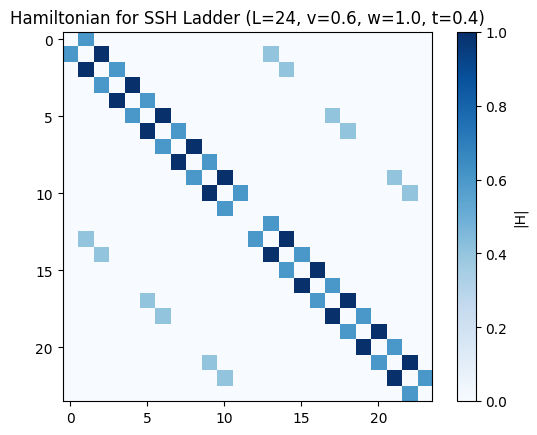

In [8]:
plt.imshow(np.abs(build_real_space_H(L, v, w, t)), cmap='Blues')
plt.colorbar(label='|H|')
plt.title("Hamiltonian for SSH Ladder" + f" (L={L}, v={v}, w={w}, t={t})")

In [70]:
L = 24
w = 1.0

i = 0; j = 0

v_min, v_max = 0.1, 1.4
t_min, t_max = 0.1, 2.2
delta = 0.1
IPR_mat = np.zeros(((int(round((v_max - v_min)/delta))+1, int(round((t_max - t_min)/delta))+1)))


for v in np.arange(v_min, v_max+0.01, delta):
    j = 0
    for t in np.arange(t_min, t_max+0.01, delta): 
        H = build_real_space_H(L, v, w, t)
        E, V = np.linalg.eigh(H)
        IPR = np.sum(np.abs(V[L//2,:])**4, axis=0)
        IPR_mat[i,j] = IPR
        #print(f"v={v}, t={t}, IPR={IPR}")
        j+=1
    i+=1

Text(0.5, 1.0, 'IPR on edge site (L=24, w=1.0)')

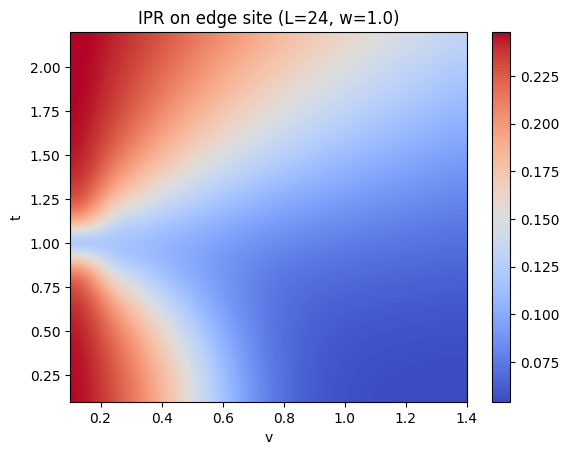

In [69]:
plt.imshow(IPR_mat.T, cmap='coolwarm', origin='lower',
           extent=[v_min, v_max, t_min, t_max], aspect="auto", interpolation='spline36')
plt.xlabel('v')
plt.ylabel('t')
plt.colorbar()
plt.title(f'IPR on edge site (L={L}, w={w})')